# Notebook 1: Introducción al aprendizaje por refuerzos

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2019

***
## 2. Algoritmo Q-Learning en "The Cliff"

> Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

In [16]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
import matplotlib.pyplot as plt
import itertools
import gym
import numpy as np
from agents.utils.plotting import plot_reward_per_episode, plot_steps_per_episode, plot_steps_per_episode_smooth, draw_value_matrix

In [18]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:
        return random_state.choice(actions)  # a random action is selected

    count = q_values.count(max_q)

    # In case there're several state-action max values
    # we select a random one among them
    if count > 1:
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        i = q_values.index(max_q)

    return actions[i]

Definimos el método learn, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo al algoritmo Q-Learning.

In [19]:
def learn(state, action, reward, next_state):
    """
    Performs a Q-Learning update for a given state transition
    """ 
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    q[(state,action)] = q.get((state, action), 0.0) \
                        + alpha*(reward + gamma*max(q_values) - q.get((state, action), 0.0))    
    pass

Finalmente, definimos el método principal de iteraciones. 

In [21]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        while not done:
            
            action = choose_action(state)
            
            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)


            episode_reward += reward

            if not done and t < max_steps:  # if the algorithm does not converge, it stops after 2000 timesteps
                learn(state, action, reward, next_state)
                state = next_state
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learn(state, action, reward, next_state)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [22]:
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500
max_steps = 2000

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

Ya instanciado, ejecutamos nuestro agente

In [23]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

## Análisis de la ejecución del agente

### Recompensa acumulada por episodio
A continuación se muestra la recompensa por episodio (recordar que cada paso otorga una recompensa de $-1$ y caer al acantilado, una de $-100$), primero para el algoritmo SARSA y luego para el algoritmo Q-Learning.

Posteriormente se realizará una comparación entre ambos resultados.

**Recompensa con algoritmo SARSA**
![](resultados/recompensa_1.png)

**Recompensa con Q-Learning**

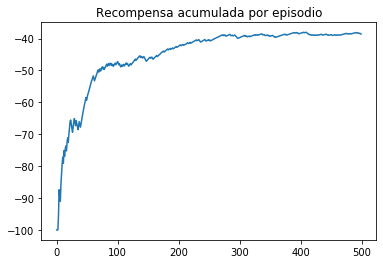

In [28]:
plot_reward_per_episode(reward_ep)

Se puede observar que la recompensa obtenida por el algoritmo SARSA es superior a la de Q-Learning, ésto se debe a que el primero sigue una política y funciona correctamente cuando están claros los objetivos y metas. En cambio, el segundo no sigue una política sino que busca aproximar la función Q óptima. Esta sitaución también puede interpretarse en base al riesgo que toma cada algoritmo al decidir; donde el primero toma menos riesgos y se ajusta a una política y el segundo toma muchos más riesgos buscando encontrar el camino óptimo, y en las decisiones tomadas con riesgo es donde acumula más recompensas de -100 que el primero.

### Pasos por episodio

A continuación se muestra la cantidad de pasos que le llevó al agente por cada episodio (sin suavizar y suavizados).

En este caso también se evaluarán los resultados de los algoritmos SARSA y Q-Learning.

**Pasos con algoritmo SARSA**
![](resultados/pasos_1_a.png)

**Pasos con Q-Learning**

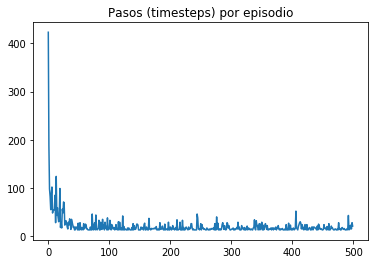

In [25]:
plot_steps_per_episode(timesteps_ep)

### Mínima cantidad de pasos por episodio

**Mínima cantidad de pasos con SARSA**
![](resultados/pasos_min_1.png)

**Mínima cantidad de pasos con Q-Learning**

In [30]:
min(timesteps_ep)

13.0

### Pasos por episodio (suavizados)

**Pasos con algoritmo SARSA**
![](resultados/pasos_1_b.png)

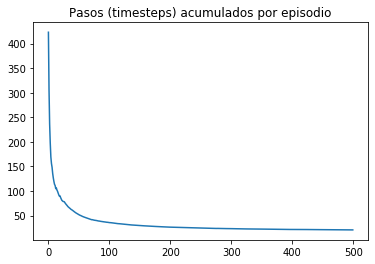

In [26]:
plot_steps_per_episode_smooth(timesteps_ep)

Al analizar la cantidad de pasos no se observan diferencias pero calculando el mínimo se puede verificar que este algoritmo, al ser más arriesgado y buscar el camino óptimo, logra hacer menos pasos que el SARSA (mínimo 17 pasos).

### Matriz de acción-valor y política óptima

A continuación se puede observar desde otro punto de vista la convergencia alcanzada por el agente; es decir desde el valor de la función $Q(s,a)$ para la mejor acción de cada estado, al finalizar el entrenamiento del agente.

En primera instancia se muestran los resultados obtenidos con SARSA. Luego se muestra la matriz que resulta de aplicar el algoritmo Q-Learning y se hace un análisis comparativo entre ellas.

**Matriz con algoritmo SARSA**
![](resultados/matriz_1.png)

**Matriz con Q-Learning**

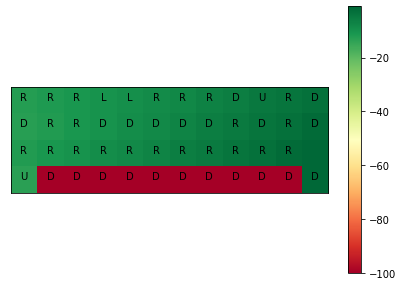


 Matriz de mejor acción-valor (en números): 

 [[ -12.31888313  -11.74616409  -10.95929743  -10.06409995   -9.23776351
    -8.48259366   -7.63726607   -6.74335694   -5.79852494   -4.8515625
    -3.96905543   -2.99549806]
 [ -12.90187539  -11.99159781  -10.99701954   -9.99889893   -8.9998608
    -7.99993342   -6.99997469   -5.99999514   -4.99999789   -3.99999933
    -2.99999988   -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [27]:
draw_value_matrix(q)

Al observar ambas matrices, a simple vista no parece haber tanta diferencia pero al prestar atención a los estados con mayor valor (los verdes), se puede notar que Q-Learning tiene valores más altos que SARSA (verdes más oscuros). Esto tiene sentido al recordar que Q-Learning justamente intenta aproximar la función Q óptima, lo que se refleja directamente en los valores de Q.

In [15]:
env.close()